In [1]:
#Auto setting directory to make it simpler upon opening notebook
import os 
os.chdir ('C:/Users/peter/Documents/Newcastle Uni - Data Science/CSC8635 - Machine Learning with Project/Project/Notebooks')

In [2]:
#Hiding deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#importing libraries to be used in analysis below
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import statsmodels.api as sm
import pylab
import nbconvert
import random
from random import choices

In [4]:
#importing machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

In [5]:
#saving training data csv as data frame in environment
train = pd.read_csv (r'Data/train.csv')
#observing shape of training data
train.shape

(891, 12)

In [6]:
#saving test data csv as data frame in environment
test = pd.read_csv (r'Data/testdata_with_groundTruth.csv')
#observing shape of test data
test.shape

(418, 12)

In [7]:
#concatenating training and test data to full dataset and storing
#Adding marker to test and train data before joining for easy splitting later
train['train_test'] = 1
test['train_test'] = 0
data_all = pd.concat([train, test])
data_all.shape

(1309, 13)

In [197]:
#eyeballing column names get a feel for the variables
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [198]:
#viewing the head of the data to get a feel for the data structure
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [199]:
#displaying useful info about the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [200]:
#displaying useful descriptive stats about the training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


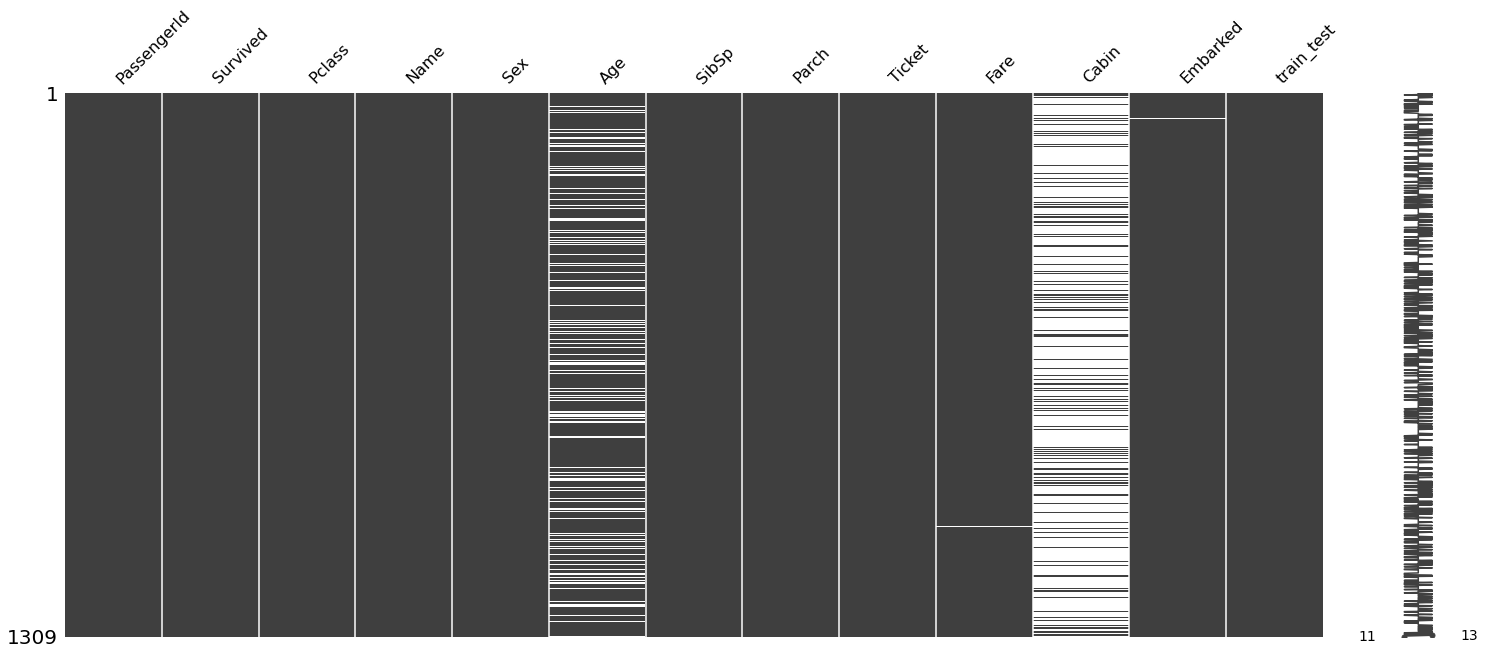

In [202]:
#visualising the missing values in the dataset (white is missing)
missingno.matrix(data_all);

In [203]:
#Replacing N/A values with most common embark location (Southampton)
data_all['Embarked'] = data_all['Embarked'].fillna('S')

Text(0, 0.5, 'Frequency')

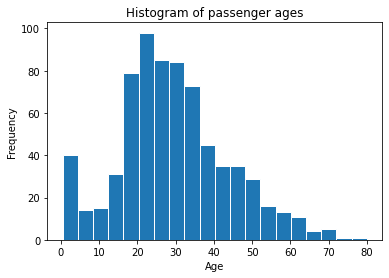

In [158]:
#plotting histogram of age data
plt.hist(train.Age, bins=20, edgecolor = "white")
plt.title('Histogram of passenger ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

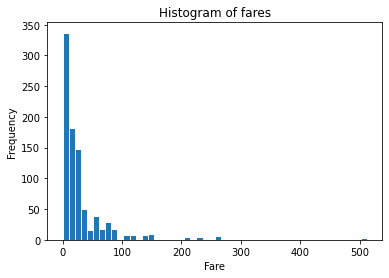

In [159]:
#plotting histogram of fares data
plt.hist(train.Fare, bins = 50, edgecolor = "white")
plt.title('Histogram of fares')
plt.xlabel('Fare')
plt.ylabel('Frequency');

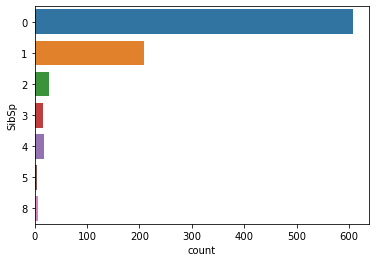

In [160]:
#plotting bar plot of SibSp data
sns.countplot(y = 'SibSp', data = train);

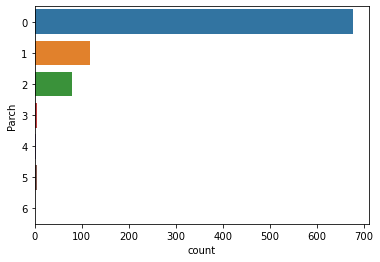

In [161]:
#plotting bar plot of parents/children aboard data
sns.countplot(y = 'Parch', data = train);

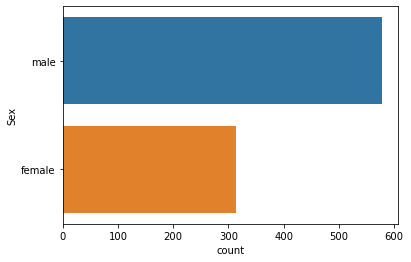

In [162]:
#plotting bar plot of sex data
sns.countplot(y = 'Sex', data = train);
#plt.yticks([0,1],['Male', 'Female']);

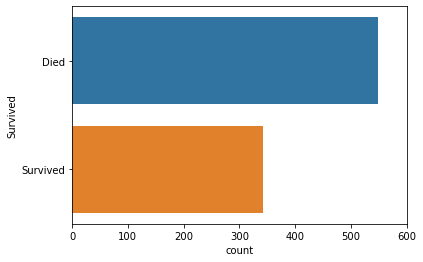

In [163]:
#plotting bar plot of survivor data
sns.countplot(y = 'Survived', data = train)
plt.yticks([0,1],['Died', 'Survived'])
plt.xlim(0, 600);

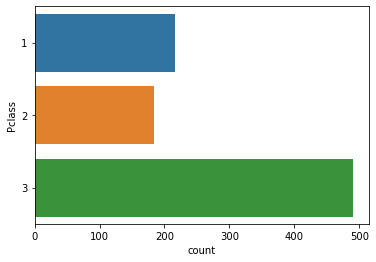

In [164]:
#plotting bar plot of class data
sns.countplot(y = 'Pclass', data = train);

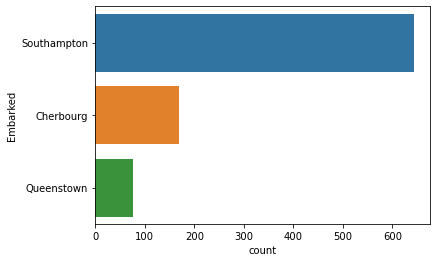

In [165]:
#plotting bar plot of embark location data
sns.countplot(y = 'Embarked', data = train)
plt.yticks([0,1,2],['Southampton', 'Cherbourg', 'Queenstown']);

In [166]:
#One hot encoding embark location and sex
train = pd.get_dummies(train, columns=['Embarked', 'Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked', 'Sex'], drop_first=True)
data_all = pd.get_dummies(data_all, columns=['Embarked', 'Sex'], drop_first=True)

In [167]:
#creating correlation matrix of the training data to explore correlation between variables
correlation_matrix = train.drop('train_test', axis=1).corr().round(2)

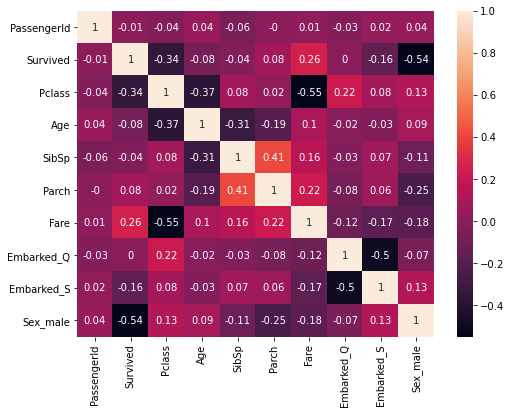

In [168]:
#using heatmap to plot correlation matrix with conditional formatting, higjhlighting interesting values
fig, ax = plt.subplots(figsize=(8,6)) 
corel = sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

In [169]:
#creating pivot table to view averages for died/survived for each variable
survival_pivot = pd.pivot_table(train, index = "Survived")
survival_pivot.style.set_caption("Averages of each variable vs survival")

,Age,Embarked_Q,Embarked_S,Fare,Parch,PassengerId,Pclass,Sex_male,SibSp,train_test
Survived,,,,,,,,,,
0,30.626179,0.085610,0.777778,22.117887,0.329690,447.016393,2.531876,0.852459,0.553734,1
1,28.343690,0.087719,0.634503,48.395408,0.464912,444.368421,1.950292,0.318713,0.473684,1


## Preprocessing & Feature Engineering

In [170]:
#replacing N/A values of Fare with training median since not normally distributed
data_all.Fare = data_all.Fare.fillna(train.Fare.median())
#replacing N/A values of Age with training mean since normally distributed
data_all.Age = data_all.Age.fillna(train.Age.mean())

In [171]:
#Extracting first letter of cabin code as new column
data_all['cabin_letter'] = data_all.iloc[:,9].apply(lambda x: str(x)[0])
data_all.loc[data_all['cabin_letter'] == 'n', 'cabin_letter'] = 'Unknown'
#dropping original cabin column
data_all = data_all.drop('Cabin', axis=1)

In [172]:
#Extracting title from name and adding as new column, dropping name column afterwards
data_all['Title'] = data_all.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_all = data_all.drop('Name', axis=1)

In [173]:
#viewing all titles present, deciding on grouping
data_all.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Dona          1
Don           1
Mme           1
Countess      1
Sir           1
Lady          1
Jonkheer      1
Name: Title, dtype: int64

In [174]:
#Aggregating similar titles
data_all['Title'] = data_all['Title'].replace(['Mlle'],'Miss')
data_all['Title'] = data_all['Title'].replace(['Mme','Ms'],'Mrs')
data_all['Title'] = data_all['Title'].replace(['Rev','Col', 'Dr', 'Major', 'Capt'],'Honoured')
data_all['Title'] = data_all['Title'].replace(['Sir', 'Don', 'Dona', 'Lady', 'Jonkheer', 'Countess'],'Noble')

In [175]:
#Check the above worked and view distribution
data_all.Title.value_counts()

Mr          757
Miss        262
Mrs         200
Master       61
Honoured     23
Noble         6
Name: Title, dtype: int64

In [176]:
#One hot encoding title and cabin letter
data_all = pd.get_dummies(data_all, columns=['Title', 'cabin_letter'], drop_first=True)

In [177]:
#Using qcut to split age data into 7 similarly sized groups
pd.qcut(data_all.Age, 7)

0        (18.0, 24.0]
1        (33.0, 43.0]
2        (24.0, 29.0]
3        (33.0, 43.0]
4        (33.0, 43.0]
            ...      
413    (29.0, 29.699]
414      (33.0, 43.0]
415      (33.0, 43.0]
416    (29.0, 29.699]
417    (29.0, 29.699]
Name: Age, Length: 1309, dtype: category
Categories (7, interval[float64]): [(0.169, 18.0] < (18.0, 24.0] < (24.0, 29.0] < (29.0, 29.699] < (29.699, 33.0] < (33.0, 43.0] < (43.0, 80.0]]

In [178]:
#Grouping continuous age data into ordinal numeric groups
data_all['Age'] = data_all['Age'].astype(int)
data_all.loc[data_all['Age'] <= 18, 'Age'] = 0
data_all.loc[(data_all['Age'] > 18) & (data_all['Age'] <= 24), 'Age'] = 1
data_all.loc[(data_all['Age'] > 24) & (data_all['Age'] <= 29), 'Age'] = 2
data_all.loc[(data_all['Age'] > 29) & (data_all['Age'] <= 29.699), 'Age'] = 3
data_all.loc[(data_all['Age'] > 29.699) & (data_all['Age'] <= 33), 'Age'] = 4
data_all.loc[(data_all['Age'] > 33) & (data_all['Age'] <= 43), 'Age'] = 5
data_all.loc[data_all['Age'] > 43, 'Age'] = 6

In [179]:
#checking distribution of groups
data_all['Age'].value_counts()

2    423
1    213
0    196
6    186
5    177
4    114
Name: Age, dtype: int64

In [180]:
#Using qcut to split Fare data into 6 similarly sized groups
pd.qcut(data_all.Fare, 6)

0      (-0.001, 7.775]
1      (53.1, 512.329]
2       (7.775, 8.662]
3         (26.0, 53.1]
4       (7.775, 8.662]
            ...       
413     (7.775, 8.662]
414    (53.1, 512.329]
415    (-0.001, 7.775]
416     (7.775, 8.662]
417     (14.454, 26.0]
Name: Fare, Length: 1309, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.775] < (7.775, 8.662] < (8.662, 14.454] < (14.454, 26.0] < (26.0, 53.1] < (53.1, 512.329]]

In [181]:
#Grouping continuous fare data into ordinal numeric groups
data_all.loc[data_all['Fare'] <= 7.91, 'Fare'] = 0
data_all.loc[(data_all['Fare'] > 7.91) & (data_all['Fare'] <= 14.454), 'Fare'] = 1
data_all.loc[(data_all['Fare'] > 14.454) & (data_all['Fare'] <= 31), 'Fare']   = 2
data_all.loc[(data_all['Fare'] > 31) & (data_all['Fare'] <= 99), 'Fare']   = 3
data_all.loc[(data_all['Fare'] > 99) & (data_all['Fare'] <= 250), 'Fare']   = 4
data_all.loc[data_all['Fare'] > 250, 'Fare'] = 5
data_all['Fare'] = data_all['Fare'].astype(int)

In [182]:
#viewing grouping of fare data
data_all['Fare'].value_counts()

0    337
2    332
1    310
3    246
4     67
5     17
Name: Fare, dtype: int64

In [183]:
#Dropping passenger ID and Ticket code
data_all = data_all.drop(['PassengerId','Ticket'], axis=1)

In [184]:
#Creating new feature called from combination of SibSp and Parch
data_all['Family'] = data_all['SibSp'] + data_all['Parch']

In [185]:
#Creating new binary feature which shows whether passenger
#was traveling alone or not
data_all['Alone'] = 0
data_all.loc[data_all['Family']==0, 'Alone'] = 1

In [186]:
#manual dropping of features (not used but kept in case wanted)
to_drop = ['Family']
              #'cabin_letter_C', 'cabin_letter_D',
              #'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G',
              #'cabin_letter_T', 'Family']
data_all = data_all.drop(to_drop, axis=1)

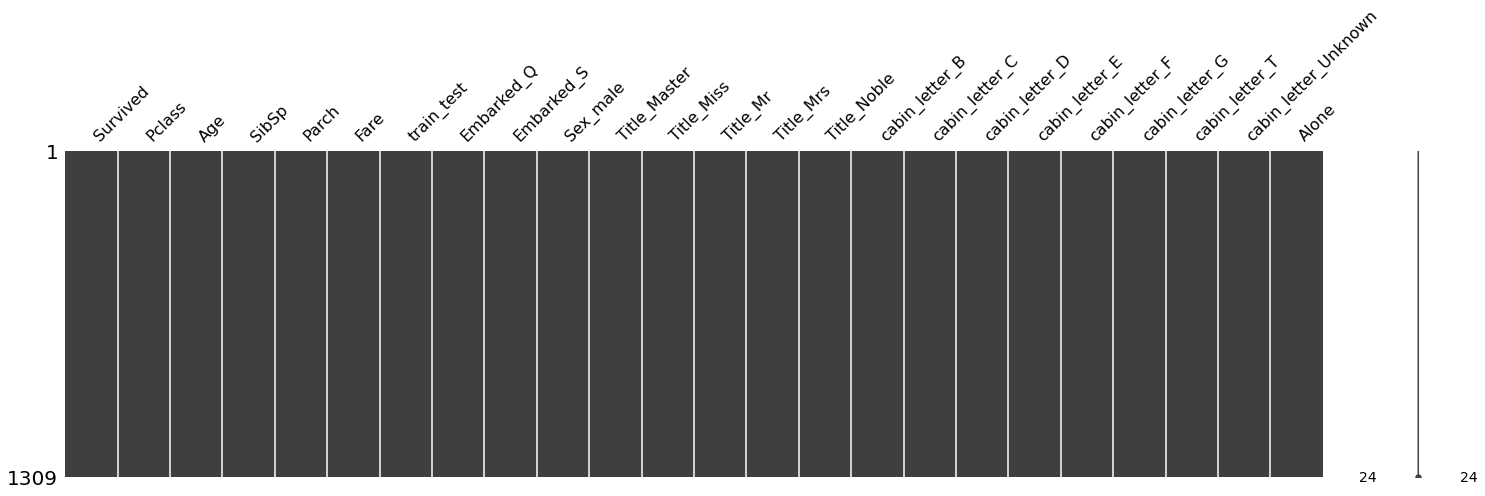

In [187]:
#revisiting the missing number matrix
#to view features and confirm data is complete
missingno.matrix(data_all, figsize=(25, 6));

In [69]:
#viewing head of data to view strucutre of the data
data_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,train_test,Embarked_Q,Embarked_S,Sex_male,...,Title_Noble,cabin_letter_B,cabin_letter_C,cabin_letter_D,cabin_letter_E,cabin_letter_F,cabin_letter_G,cabin_letter_T,cabin_letter_Unknown,Alone
0,0,3,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,5,1,0,3,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,3,2,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1,5,1,0,3,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,5,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1


In [70]:
#redefining test and train data and splitting into
#predictor (X) and response (y) variables
train = data_all[data_all.train_test == 1].drop('train_test', axis=1)
test = data_all[data_all.train_test == 0].drop('train_test', axis=1)
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_X = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [71]:
#Scaling numeric variables using standardisation transformation (Not used)
train_X_scaled = train_X.copy()
test_X_scaled = test_X.copy()
mms = MinMaxScaler(feature_range=(0,1))
mms.fit(train_X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
train_X_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = mms.transform(train_X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
test_X_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = mms.transform(test_X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [72]:
#Experimenting with linear Discriminant analysis to reduce dimensionality of data
#lda = LinearDiscriminantAnalysis()
#lda.fit(train_X, train_y)
#train_X_lda = lda.transform(train_X)
#test_X_lda = lda.transform(test_X)

## Logistic regression

In [73]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=10, scoring='accuracy')
rfecv.fit(train_X_scaled, train_y)
print(f"Optimal number of features: {rfecv.n_features_}")
print(f'Selected features: {list(train_X_scaled.columns[rfecv.support_])}')

Optimal number of features: 19
Selected features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'cabin_letter_B', 'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G', 'cabin_letter_T', 'cabin_letter_Unknown']


In [74]:
#savingh selected features as fslr
fslr = list(train_X_scaled.columns[rfecv.support_])
#filtering for selected features in train and test set using indexing
train_X_fslr = train_X_scaled[fslr]
test_X_fslr = test_X_scaled[fslr]

In [75]:
#Saving logistic regression function as variable
lr=LogisticRegression()
#specifying hyperparameters to try in tuning
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
#saving hyperparameters as dictionary for tuning
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#Using grid search cross validation to select optimal hyperparameters from above
#5 fold CV used with parallel computing
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
#fitting grid search to training data
grid_result_lr = grid_search_lr.fit(train_X_fslr, train_y)
#reporting training error from 5-fold CV for best model selected by GridSearchCv
print(f"Training error: {(1-grid_result_lr.best_score_).round(4)} using {grid_result_lr.best_params_} ({grid_result_lr.best_score_.round(4)*100}% accuracy at predicting validation response variables)")

Training error: 0.1751 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'} (82.49% accuracy at predicting validation response variables)


In [76]:
#using tuned model to predict test response variables ('Survived') based on test predictors
yhat_lr = grid_result_lr.predict(test_X_fslr)
print(f'Logistic regression model predicted the test set with: {(test_y==yhat_lr).mean()*100}% accuracy\n(Test error: {(1-test_y==yhat_lr).mean()})')

Logistic regression model predicted the test set with: 76.55502392344498% accuracy
(Test error: 0.23444976076555024)


In [77]:
#viewing coefficients
grid_result_lr.best_estimator_.coef_

array([[-1.43044009, -0.48127346, -3.36156388, -1.44923779,  0.57888878,
        -0.35709693, -2.58979325,  2.86639986,  0.        , -0.30146756,
         0.47948864,  0.20705053, -0.00526871,  0.58141214,  0.86548055,
         0.03992752,  0.        ,  0.        , -0.31997536]])

In [78]:
#creating confusion matrix from ground truth and predicted values for 'Survived'
cmlr = confusion_matrix(test_y, yhat_lr)
cmlr

array([[207,  53],
       [ 45, 113]], dtype=int64)

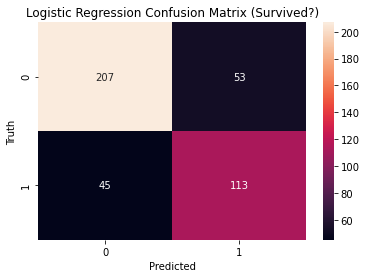

In [79]:
#Formatting confusion matrix into heatmap.
#Labels manually specified due to formatting issues
labels =  cmlr
sns.heatmap(cmlr, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Confusion Matrix (Survived?)');

## Random Forest

In [80]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rf = RandomForestClassifier()
rfecv_rf = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfecv_rf.fit(train_X_scaled, train_y)
print(f"Optimal number of features: {rfecv_rf.n_features_}")
print(f'Selected features: {list(train_X_scaled.columns[rfecv_rf.support_])}')
fsrf = list(train_X_scaled.columns[rfecv_rf.support_])
train_X_fsrf = train_X_scaled[fsrf]
test_X_fsrf = test_X_scaled[fsrf]

Optimal number of features: 9
Selected features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Sex_male', 'Title_Mr', 'cabin_letter_Unknown']


In [81]:
##Setting hyperparamters for grid to be used in cross validation
#number of trees in the forest to try
n_estimators_rf = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#maximum features to consider looking or best split
max_features_rf = ['auto', 'sqrt']
#maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Use bootstrap sampling or not
bootstrap = [True, False]
#Minimum number of samples to split internal node
min_samples_split = [2, 5, 10]
#min number of samples to be at a leaf node
min_samples_leaf = [1, 2, 4]
#group hyperparameters ito grid as dictionary
rf_grid = {'n_estimators': n_estimators_rf,
               'max_features': max_features_rf,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_rscv.fit(train_X_fsrf, train_y)
#reporting training error from 5-fold CV for best model selected by GridSearchCv
print(f"Training error: {1-rf_rscv.best_score_} using {rf_rscv.best_params_} ({rf_rscv.best_score_.round(4)*100}% accuracy at predicting training response variables)")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


Training error: 0.16273303621869317 using {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True} (83.73% accuracy at predicting training response variables)


In [83]:
#using tuned model to predict test response variables ('Survived') based on test predictors
yhat_rf = rf_rscv.predict(test_X_fsrf)
print(f'Random forest model predicted the test response with: {(test_y==yhat_rf).mean()*100}% accuracy\n(Test error: {(1-test_y==yhat_rf).mean()})')

Random forest model predicted the test response with: 76.31578947368422% accuracy
(Test error: 0.23684210526315788)


In [84]:
#creating confusion matrix from ground truth and predicted values for 'Survived'
cmrf = confusion_matrix(test_y, yhat_rf)
cmrf

array([[212,  48],
       [ 51, 107]], dtype=int64)

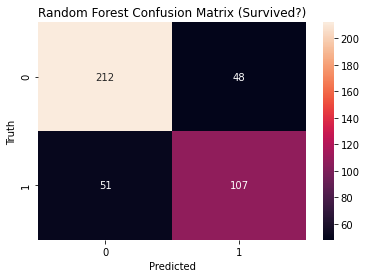

In [85]:
#Formatting confusion matrix into heatmap.
#Labels manually specified due to formatting issues
labels =  cmrf
sns.heatmap(cmrf, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix (Survived?)');

# Multinomial Naive Bayes

In [86]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
mnb = MultinomialNB()
rfecv_mnb = RFECV(estimator=mnb, step=1, cv=5, scoring='accuracy')
rfecv_mnb.fit(train_X_scaled, train_y)
print(f"Optimal number of features: {rfecv_mnb.n_features_}")
print(f'Selected features: {list(train_X_scaled.columns[rfecv_mnb.support_])}')
fsmnb = list(train_X_scaled.columns[rfecv_mnb.support_])
train_X_fsmnb = train_X_scaled[fsmnb]
test_X_fsmnb = test_X_scaled[fsmnb]

Optimal number of features: 16
Selected features: ['SibSp', 'Parch', 'Embarked_Q', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Noble', 'cabin_letter_B', 'cabin_letter_C', 'cabin_letter_D', 'cabin_letter_E', 'cabin_letter_F', 'cabin_letter_G', 'cabin_letter_T']


In [87]:
##Setting hyperparamters for grid to be used in cross validation
mnb_grid = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}

In [88]:
mnb = MultinomialNB()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
mnb_rscv = GridSearchCV(estimator = mnb, param_grid = mnb_grid, cv = 5, verbose=2, n_jobs=-1)
# Fit the random search model
mnb_rscv.fit(train_X_fsmnb, train_y)
#reporting training error from 5-fold CV for best model selected by GridSearchCv
print(f"Training error: {1-mnb_rscv.best_score_} using {mnb_rscv.best_params_} ({mnb_rscv.best_score_.round(4)*100}% accuracy at predicting training response variables)")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training error: 0.20878162073943884 using {'alpha': 1} (79.12% accuracy at predicting training response variables)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [136]:
#using tuned model to predict test response variables ('Survived') based on test predictors
yhat_mnb = mnb_rscv.predict(test_X_fsmnb)
print(f'Multinomial Naive Bayes model predicted the test response with: {(test_y==yhat_mnb).mean()*100}% accuracy\n(Test error: {(1-test_y==yhat_mnb).mean()})')

Multinomial Naive Bayes model predicted the test response with: 77.03349282296651% accuracy
(Test error: 0.22966507177033493)


In [137]:
#creating confusion matrix from ground truth and predicted values for 'Survived'
cmmnb=confusion_matrix(test_y, yhat_mnb)
cmmnb

array([[214,  46],
       [ 50, 108]], dtype=int64)

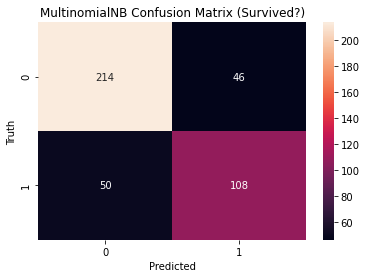

In [139]:
#Formatting confusion matrix into heatmap.
#Labels manually specified due to formatting issues
labels =  cmmnb
sns.heatmap(cmmnb, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('MultinomialNB Confusion Matrix (Survived?)');

# Deep Learning

In [122]:
random.seed(42)
train_X_DL = train_X_fsrf #pd.get_dummies(train_X[fsrf], columns=['Pclass', 'Age', 'Fare'], drop_first=True)
test_X_DL = test_X_fsrf #pd.get_dummies(test_X[fsrf], columns=['Pclass', 'Age', 'Fare'], drop_first=True)
train_y_DL = train_y
#Shuffling data prior to cross validation to increase randomness
train_X_DL, train_y_DL = shuffle(train_X_DL, train_y_DL)

In [125]:
train_X_DL.shape

(891, 9)

In [126]:
def build_model(hp):
    mlp_model = keras.models.Sequential()
    mlp_model.add(Dense(hp.Int('input_units', 16, 256, 16), input_dim=train_X_DL.shape[1]))
    mlp_model.add(Activation('relu'))
    
    for i in range(hp.Int("n_layers", 1, 4)):
        mlp_model.add(Dense(hp.Int(f'dense_{i}_units', 16, 256, 16)))
        mlp_model.add(Activation('relu'))
    
    mlp_model.add(Dense(2))
    mlp_model.add(Activation('softmax'))
    
    mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return mlp_model

In [127]:
tuner_mlp = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    directory = 'log_dir'
   )

In [128]:
tuner_mlp.search(x=train_X_DL,
                y=train_y_DL,
                epochs=50,
                batch_size=10,
                validation_split=0.15)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.8432835936546326

Best val_accuracy So Far: 0.8482587138811747
Total elapsed time: 00h 01m 32s
INFO:tensorflow:Oracle triggered exit


In [129]:
print(tuner_mlp.results_summary())

Results summary
Results in log_dir\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 224
n_layers: 2
dense_0_units: 208
dense_1_units: 64
dense_2_units: 144
Score: 0.8482587138811747
Trial summary
Hyperparameters:
input_units: 64
n_layers: 1
dense_0_units: 208
dense_1_units: 176
dense_2_units: 64
Score: 0.8482587138811747
Trial summary
Hyperparameters:
input_units: 224
n_layers: 3
dense_0_units: 80
dense_1_units: 16
dense_2_units: 16
Score: 0.8457711537679037
Trial summary
Hyperparameters:
input_units: 176
n_layers: 2
dense_0_units: 160
dense_1_units: 144
dense_2_units: 128
Score: 0.8457711537679037
Trial summary
Hyperparameters:
input_units: 112
n_layers: 3
dense_0_units: 32
dense_1_units: 208
dense_2_units: 32
Score: 0.8432835936546326
None


In [130]:
mlp_predictions = tuner_mlp.get_best_models()[0].predict(x=test_X_DL, batch_size=10, verbose=0)

In [131]:
yhat_mlp = np.argmax(mlp_predictions, axis=-1)
print(f'Multi-layer perceptron model predicted the test response with:{(test_y==yhat_mlp).mean()*100}% accuracy\n(Test error: {(1-test_y==yhat_mlp).mean()})')

Multi-layer perceptron model predicted the test response with:77.51196172248804% accuracy
(Test error: 0.22488038277511962)


In [132]:
#creating confusion matrix from ground truth and predicted values for 'Survived'
cmmlp = confusion_matrix(test_y, yhat_mlp)
cmmlp

array([[224,  36],
       [ 58, 100]], dtype=int64)

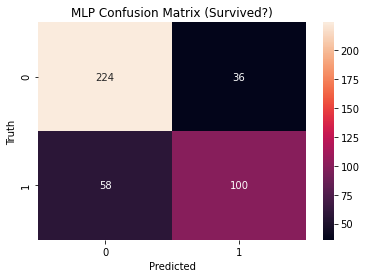

In [133]:
#Formatting confusion matrix into heatmap.
#Labels manually specified due to formatting issues
labels =  cmmlp
sns.heatmap(cmmlp, annot=labels, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('MLP Confusion Matrix (Survived?)');

## Comparison

In [134]:
model_comparison_table = pd.DataFrame({
    'Model': ['Multi-Layer Perceptron', 'Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes'],
    
    'Training Accuracy': [0.8532338341077169*100, grid_result_lr.best_score_*100, rf_rscv.best_score_*100, mnb_rscv.best_score_*100],
    
    'Test Accuracy': [(test_y==yhat_mlp).mean()*100, (test_y==yhat_lr).mean()*100, (test_y==yhat_rf).mean()*100, (test_y==yhat_mnb).mean()*100]
    })

model_comparison_table.sort_values(by=['Test Accuracy'], inplace=True, ascending=False)

model_comparison_table = model_comparison_table.reset_index(drop=True)

In [135]:
model_comparison_table

,Model,Training Accuracy,Test Accuracy
0,Multi-Layer Perceptron,85.323383,77.511962
1,Multinomial Naive Bayes,79.121838,77.033493
2,Logistic Regression,82.491369,76.555024
3,Random Forest,83.726696,76.315789
